In [73]:
import numpy as np ; import pandas as pd ; import matplotlib.pyplot as plt
import seaborn as sns ; import pymc3 as pm; 
import os

# Plotting Style 
plt.style.use("classic")
plt.rcParams["figure.figsize"] = [5,5]

def readcsv_and_assign(filename):
    cwd = os.chdir("/Users/jackcarter/Documents/Data_Mixtures")
    df = pd.read_csv(filename, engine = "python")
    return df

# Read in Data
pkf = readcsv_and_assign('m_h_h7f_kfeld.csv')

# Assign Variables
temp = pkf["Temp"].values
ar4039 = pkf["40Ar/39Ar"].values
ar3739 = pkf["37Ar/39Ar"].values
ar3639 = pkf["36Ar/39Ar (x10-3)"].values
ar39k = pkf["39Ark (x10-13 mol)"].values
cum39ar = pkf["%39K rel"].values
ar40r = pkf["40Ar*"].values
ar40r39 = pkf["40Ar*/39Ark"].values
age = pkf["Age"].values
age_err = pkf["1 s.d."].values

# Function to visualise age spectra 
# and probability density of age distribution
def age_plots(x, y, err):
    
    font = {"weight":"normal", 
            "size": 15, 
            "family": "Arial"}
    plt.rc("font", **font)
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (10,5))
    ax = axs[0]
    ax.fill_between(x, y-2*err, y + 2*err, 
                    interpolate = True, step = 'pre')
    ax.plot(cum39ar, age, drawstyle = 'steps')
    ax.set_xlabel('Cumulative $^{39}$Ar (%)'); ax.set_ylabel('Age (Ma)'); 
    ax.set_ylim(10, 25)
    
    ax = axs[1]
    ax = sns.distplot(x, bins = 7, hist_kws = {"color": "blue", "lw": 2},
                      kde_kws = {"lw":2.4, "color": "k"})
    ax.set_xlabel('Age (Ma)'); ax.set_ylabel('Probability Density')
    plt.tight_layout()
   # ax.set_ylim(0,0.1)

# Function to view inverse isochron and 
# return x and y values

def inverse_isochron(a,b): 
    y = (1/(a/1000)) * b
    y = 1/y ; x = 1/b 
    plt.scatter(x,y, s= 30); #plt.ylim(0, 0.003); plt.xlim(0,0.3);
    plt.xlabel('$^{39}$Ar/$^{40}$Ar');
    plt.ylabel('$^{36}$Ar/$^{40}$Ar');
    return x,y



/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


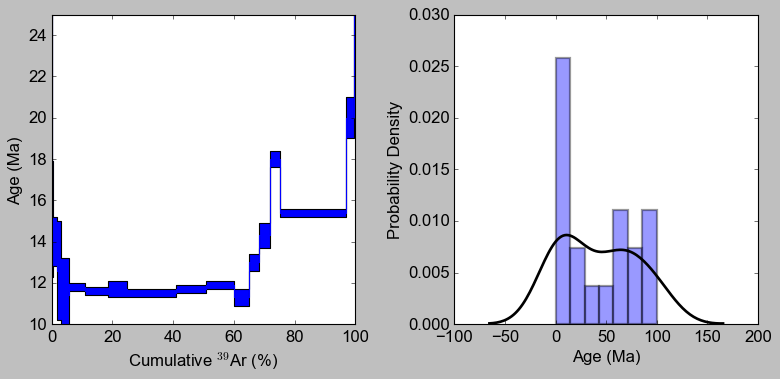

In [74]:
age_plots(cum39ar, age, age_err)
#plt.ylim(10, 25)


Text(0, 0.5, 'Temperature ($^{o}$C)')

<Figure size 640x480 with 0 Axes>

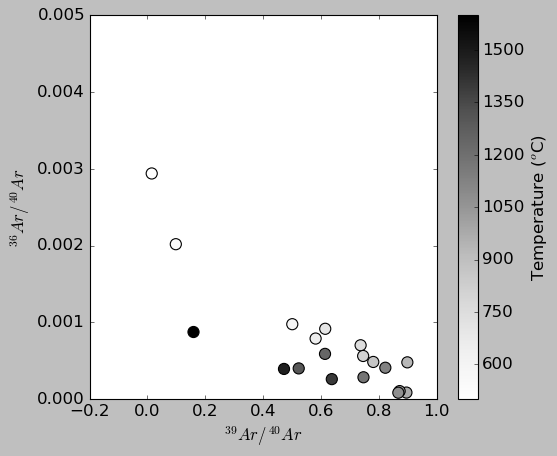

In [75]:
# GreyScale
# Data 
y = (1/(ar3639/1000)) * ar4039
y = 1/y ; x = 1/ar4039 

# Color
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

import matplotlib.cm as cm
plt.figure(figsize = (8,6))
plt.figure(figsize = (7,6))
plt.scatter(x, y, c=temp, cmap=cm.Greys, s = 100)
plt.xlabel('$^{39}Ar/^{40}Ar$')
plt.ylabel('$^{36}Ar/^{40}Ar$')
plt.ylim(0, 0.005)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Temperature ($^{o}$C)')

In [76]:
from theano import shared, tensor as tt
x_s = shared(x)
y_s = shared(y)
data = np.array([x, y])
cov = np.cov(data)
N = y.shape[0]


# Model
 
 
 $$ y = \alpha_{j} + \beta_{j}x + \beta_{j}x2 + \epsilon $$
 
 ## What is an Isochron 
 * An Isochron/Inverse Isochron/ Isotope ratio plot in ArAr geochronoly is in $^{36}$Ar/$^{40}$Ar vs $^{39}$Ar/$^{40}$Ar space. They do not assume a non-radiogenic $^{40}$Ar/$^{36}$Ar ratio of ~ 296 and therefore can be useful in both the recognition and diagnoses and excess $^{40}$Ar. 
 
 • Why the inverese? By making $^{40}$Ar the Argon isotope shared by both the x and y axes in the denomenator of the isotope ratio, errors are reduced as $^{40}$Ar is abundant and thus there is increasing precision in inverse isochron space. 
 Furthermore the errors have much smaller correlations owing the the typically high concentration of $^{40}$Ar, the most abundant of the Argon isotope
 
## Concepts 
* $^{40}$Ar/$^{39}$Ar geohronology has its basis in the disintegration of the unstable $^{40}$K to the stable $^{40}$Ar. Given the fundamental metronomic decay of $^{40}$K an age can be extracted from the $^{40}$K/$^{40}$Ar ratio. This ratio needs to be determined. 
In $^{40}$Ar/$^{39}$Ar geochronology the parent isotope in the decay is estimated by proxy; the $^{39}$Ar isotope. t
This is achieved by transmutation of some of the $^{39}$K in the sample to $^{39}$Ar by fast neutron bombardment. 
Thus the ability is afforded to use the $^{39}$Ar as a proxy for the parent and the entire radioistope system can be measured on a single isotopic element, Ar. 
* There is no need in this instance to perform seperate measurement of $^{40}$K and $^{40}$Ar the prior by flame photometry to establish the age. And given that it is all on one isotope high resolution mass spectrometry can be used to estimate by $^{40}$Ar and $^{39}$Ar. 

* The Age Equation 

$$  t_{age} = \frac{1}{\lambda_{total}} ln(1 + J\frac{^{40}Ar}{^{39}Ar})$$
 
 where J is the irradiation constant linking the $^{39}$Ar to the $^{40}$K. 
 
 ## Back to Isochrons
 
* Isochrons can come from two modes of experiment: 
1. The steps heating method where the points correspond to differening temperatures
2. different spots on the sample if the laser ablative method is used. 

* The data presented on an Isochron depend on the ratio of trapped argon relative to radiogenic argon. 
* High radiogenic close to the x-axis!!!! 
* Low radiogenic close to the y_axis!!!!

## Simpliest Case
If the argon released is a simple two component mixture of trapped atmospheric argon and radiogenic argon the data will present as a binary mixture distribution line between two points. 

### The y-intercept
 
 * The intercept of the y-axis ($^{36}$Ar/$^{40}$Ar) represents the ratio at which there is no-radiogenic component and it is purely atmospheric if the system is ideal. However in a system that is non-ideal there may be excess or loss of $^{40}$Ar and therefore we would see a deviation in the y-intercept from a purely atmospheric ~ 296. 
 
## The x-intercept 

* The intercept of the x_axis ($^{39}$Ar/$^{40}$Ar) reprenses the ratio if there is no natural component, i.e., this is a purely radiogenic components and thus the inverse of the x-intercept is the age of the sample. 


In [77]:
# Truncated Number of trapped components
k = 10 
# Truncated Number of age components 
m = 10

N = x.shape[0]

In [100]:
Q = pm.Model() 

with Q: 
    phi = pm.Dirichlet('phi', a = np.array([0.5]*k),
                    shape = k)
    
    tau = pm.Dirichlet('tau', a = np.array([0.5]*m), 
                      shape = m)
    

    
#######################################################################
######### Isochron Parameters #########################################

    intercepts = pm.HalfNormal('intercepts',
                               sd = 1/295.5, 
                               shape = k)
    
    K = pm.Categorical('K', p = phi,  
                                shape = N)
    
    M = pm.Categorical('M', p = tau, 
                      shape = N)

    
    intercept_k = pm.Deterministic('intercept_k', 
                                  intercepts[K])
    
    
    gradients = pm.Normal('gradients', 
                          mu = 0, 
                          sd = 5,
                          shape = m)
    
    gradient_m = pm.Deterministic('gradient_m', 
                                 gradients[M])
    
########################################################################

    x_model = pm.Uniform('x_model', 
                           lower = x.min() - 0.01,
                           upper = x.max() + 0.01,
                           shape = N)
    
    x_err = pm.HalfNormal('x_err', 
                         sd = x_model/100, 
                         shape = N)
    

    
    
    y_err = pm.HalfNormal('y_err', 
                         sd = y.mean()/20, 
                         shape = N)
    
    
    like_x = pm.Normal('x', mu = x_model, sd = x_err, 
                      observed = x)
    
    
    y_model = pm.Deterministic('y_model',
                               intercept_k + gradient_m*like_x)
    
    like_y = pm.Normal('y', mu = y_model, 
                      sd = y_err, observed = y)

In [101]:
Q.check_test_point()

K                        -43.75
M                        -43.75
gradients                -25.28
intercepts_log__          -7.70
phi_stickbreaking__      -14.06
tau_stickbreaking__      -14.06
x                     -65043.82
x_err_log__              -14.63
x_model_interval__       -26.34
y                     -53438.37
y_err_log__              -14.63
Name: Log-probability of test_point, dtype: float64

In [102]:
SAMPLES = 50000
BURN = 20000
with Q: 
    
    step1 = pm.CategoricalGibbsMetropolis([K])
    
    step2 = pm.Metropolis([y_err, x_err, 
                          gradients, intercepts, 
                          phi, x_model, tau])
    
    trace = pm.sample(SAMPLES, tune = BURN, 
                      step = [step1, step2])

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>CategoricalGibbsMetropolis: [K]
>CompoundStep
>>Metropolis: [tau]
>>Metropolis: [x_model]
>>Metropolis: [phi]
>>Metropolis: [intercepts]
>>Metropolis: [gradients]
>>Metropolis: [x_err]
>>Metropolis: [y_err]
>CategoricalGibbsMetropolis: [M]
Sampling 2 chains: 100%|██████████| 140000/140000 [11:36<00:00, 201.09draws/s]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


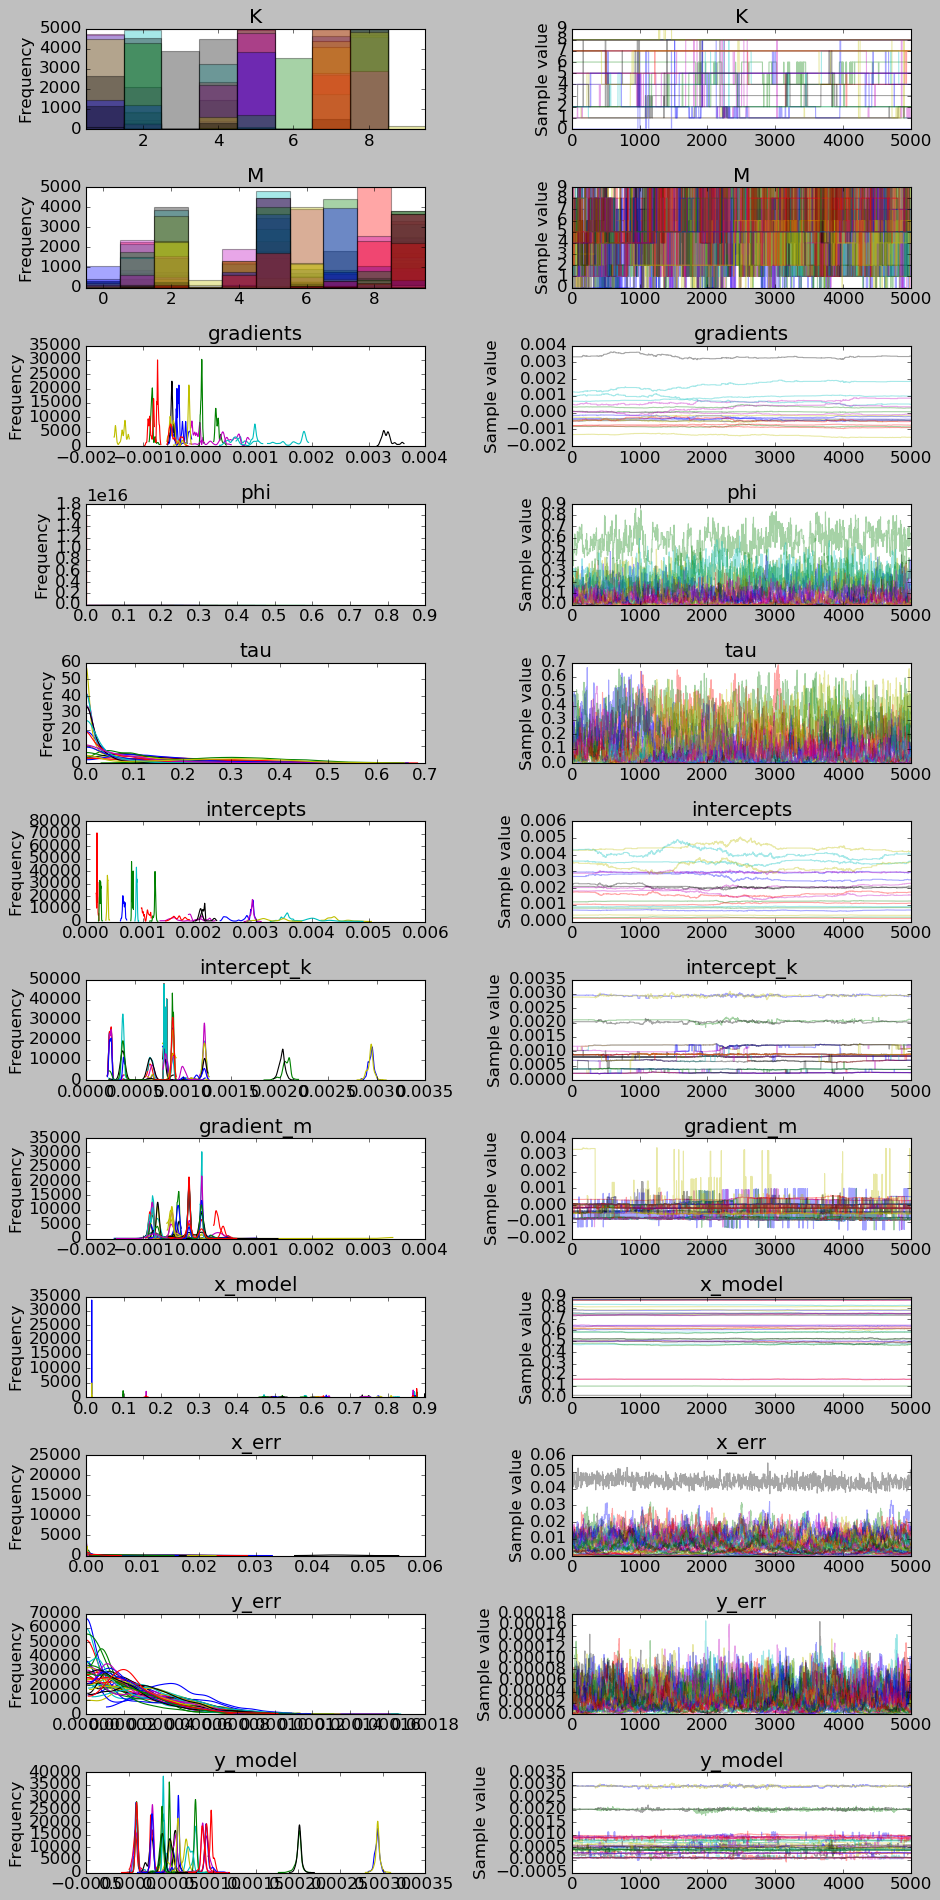

In [103]:
pm.traceplot(trace[-5000:]); 

In [104]:
with Q: 
    ppc = pm.sample_posterior_predictive(trace, 5000)

100%|██████████| 5000/5000 [00:04<00:00, 1141.46it/s]


In [105]:
x_ppc = ppc['x'].mean(axis = 0)
y_ppc = ppc['y'].mean(axis = 0)

x_err = np.percentile(ppc['x'], [2.5, 97.5], 
                     axis = 0)
y_err = np.percentile(ppc['y'], [2.5, 97.5], 
                     axis = 0)

In [ ]:
# Linear Models
for i in zip(trace): 
    

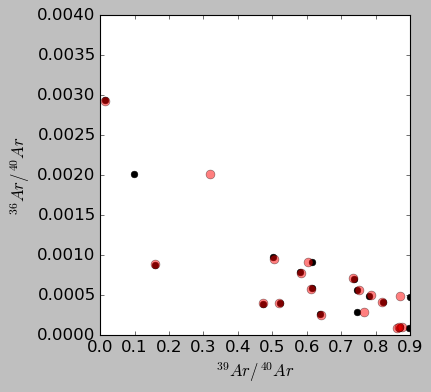

In [108]:
# GreyScale
# Data 
y = (1/(ar3639/1000)) * ar4039
y = 1/y ; x = 1/ar4039 

# Color
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

plt.plot(x, y,'ok')
plt.plot(x_ppc, y_ppc, 'or', markersize = 8, 
        alpha = 0.5)
plt.xlabel('$^{39}Ar/^{40}Ar$')
plt.ylabel('$^{36}Ar/^{40}Ar$')
plt.ylim(0,0.004);
#.xlim(0,1);


# Model with LKJ Prior for the covariance between x and y

In [107]:
from matplotlib.patches import Ellipse

# Reproducible!
np.random.seed(42)

# A helper function to make the plots with error ellipses
def plot_error_ellipses(ax, X, S, color="k"):
    for n in range(len(X)):
        vals, vecs = np.linalg.eig(S[n])
        theta = np.degrees(np.arctan2(*vecs[::-1, 0]))
        w, h = 2 * np.sqrt(vals)
        ell = Ellipse(xy=X[n], width=w, height=h,
                      angle=theta, color=color, lw=0.5)
        ell.set_facecolor("none")
        ax.add_artist(ell)
    ax.plot(X[:, 0], X[:, 1], ".", color=color, ms=4)


In [ ]:
Q = pm.Model() 

with Q: 
    phi = pm.Dirichlet('phi', a = np.array([0.5]*k),
                    shape = k)
    
    tau = pm.Dirichlet('tau', a = np.array([0.5]*m), 
                    shape = m)
    
#######################################################################
######### Isochron Parameters #########################################

    intercepts = pm.HalfNormal('intercepts',
                               sd = 1, 
                               shape = k)
    
    K = pm.Categorical('K', p = phi,  
                                shape = N)
    
    M = pm.Categorical('M', p = tau, 
                       shape = N)
    
    intercept_k = pm.Deterministic('intercept_k', 
                                  intercepts[K])
    
    
    gradients = pm.Normal('gradients', 
                          mu = 0, 
                          sd = 10,
                          shape = m)
    
    gradient_m = pm.Deterministic('gradient_m', 
                                 gradients[M])
    
########################################################################

    x_model = pm.HalfNormal('x_model', 
                           sd = x.mean()/10, shape = N)
    
    x_err = pm.HalfNormal('x_err', 
                         sd = x_model/10, 
                         shape = N)
    
    y_model = pm.Deterministic('y_model', intercept_k + gradient_m * x_model)
    
    
    y_err = pm.HalfNormal('y_err', 
                         sd = y_model/100, 
                         shape = N)
    
    
    
    mu = tt.stack([x_model, y_model]).T
    
    err = tt.stack([x_err, y_err]).T
    
    model = mu
    
    packed_L = pm.LKJCholeskyCov('packed_L', n = 2, 
                                eta = 2.,
                                sd_dist = pm.HalfCauchy.dist(5))
    
    L = pm.expand_packed_triangular(2, packed_L)
    
    obs = tt.stack([x, y]).T
    
    Like = pm.MvNormal('L1', mu = y, chol = L, 
                      observed = obs)
    
    
    
    
    
    